# Lecture 1: Introduction to FastAI

In this notebook, I will run through multiple fastai examples from surface level to understand basic structure of library.I will do  this by 
1. Running different applications it offers namely Vision, Segmentation, Text, Tabular & Collaborative filtering. 
2. Running my own datasets from kaggle like Titanic / CIFAR to reinforce the structure and concepts
3. Jotting down some pointers and comments from Video and Chapter1 of the book

## Imports

- Owing to some design decisions it has become important for now to import nlphero after fastai.basics. I will try to fix the same in future
- We need to start jupyter after activating nlphero env for fastai import to work ?
- Autocompletion issues launching jupyter from nlphero env. Try below fix
```
    pip3 install jupyter-tabnine
    jupyter nbextension install --py jupyter_tabnine
    jupyter nbextension enable --py jupyter_tabnine
    jupyter serverextension enable --py jupyter_tabnine
```

In [9]:
%config IPCompleter.greedy=True

In [10]:
from PIL import Image

## Application Examples

### Vision

In [11]:
from fastai.basics import *
from fastai.vision.all import *
from nlphero.data.external import *


#### Dogs vs Cats

In [8]:
path = untar_data(URLs.PETS)/"images"

In [5]:
(path).ls()

(#7393) [Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/wheaten_terrier_112.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/havanese_87.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/Bombay_144.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/British_Shorthair_74.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/Ragdoll_93.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/keeshond_40.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/great_pyrenees_88.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/Maine_Coon_155.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/basset_hound_14.jpg'),Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/shiba_inu_69.jpg')...]

In [6]:
imgs = get_image_files(path); len(imgs)

7390

In [7]:
imgs[0]; imgs[2]

Path('/Landmark2/pdo/.nlphero/data/oxford-iiit-pet/images/Bombay_144.jpg')

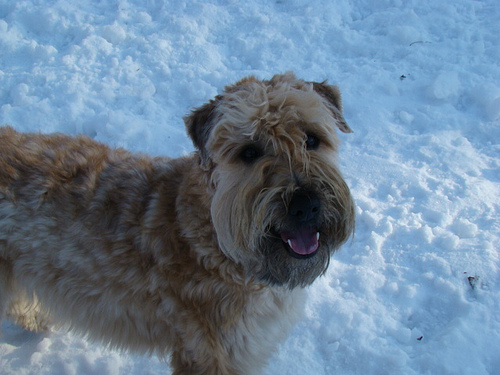

In [8]:
Image.open(imgs[0])

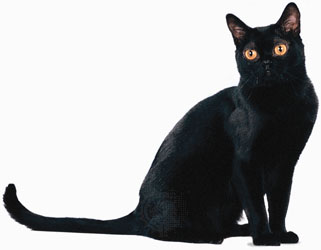

In [9]:
Image.open(imgs[2])

This dataset has
- 7393 files in image folder
- 7390 images
- Some images are starting with a capital names. They are cats
- Some images are starting with a small alphabet. They are dogs

Now let's make a model

In [10]:
def is_cat(x): return x[0].isupper()

In [11]:
is_cat(imgs[0].name), is_cat(imgs[2].name)

(False, True)

In [12]:
imgs[2].name

'Bombay_144.jpg'

In [13]:
doc(ImageDataLoaders.from_name_func)

In [15]:
!pip uninstall jupyter-tabnine -y

In [16]:
dls = ImageDataLoaders.from_name_func(path/"images", imgs, label_func=is_cat, 
                                      valid_pct=0.2, seed=42, item_tfms=Resize(224))
dls

In [17]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [18]:
learn

In [46]:
learn.fine_tune(1)

#### CIFAR10

In [14]:
path = untar_data(URLs.CIFAR);path

Path('/Landmark2/pdo/.nlphero/data/cifar10')

In [15]:
(path/"train").ls()

(#10) [Path('/Landmark2/pdo/.nlphero/data/cifar10/train/deer'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/automobile'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/bird'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/horse'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/cat'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/airplane'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/frog'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/truck'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/ship'),Path('/Landmark2/pdo/.nlphero/data/cifar10/train/dog')]

In [16]:
(path/"test").ls()

(#10) [Path('/Landmark2/pdo/.nlphero/data/cifar10/test/horse'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/frog'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/automobile'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/truck'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/dog'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/deer'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/airplane'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/bird'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/cat'),Path('/Landmark2/pdo/.nlphero/data/cifar10/test/ship')]

In [22]:
doc(ImageDataLoaders.from_folder)

In [71]:
dls = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2, seed=42, item_tfms=Resize(32));dls

In [23]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [77]:
learn.fine_tune(4)

In [83]:
dls2 = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.2, seed=42, item_tfms=Resize(28));dls2

In [84]:
learn2 = cnn_learner(dls2, resnet18, metrics=error_rate)

In [86]:
learn2.fine_tune(1)

##### Some Questions to figure out
- How to get intuition on sizes for different resnet architectures?
- What is the impact of different Resize 16, 32, 64, 128, 224, 299 etc...? In conjunction with resnet sizes?
- What is the intuitution behind number of epochs to run?
- What does fine-tune do internally? How to understand it in context of fit_one_cycle?
- Should we keep test set completely blind and split train -> train & validation? Or take `test` as validation set for cifar dataset?
- Intuition behind number 7 in terms of sizes?

### Tabular Data

#### Adult Salary

In [24]:
from fastai.basics import *
from fastai.tabular.all import *
from nlphero.data.external import *

In [25]:
path = untar_data(URLs.ADULT_SAMPLE); path

Path('/Landmark2/pdo/.nlphero/data/adult_sample')

In [26]:
path.ls()

(#3) [Path('/Landmark2/pdo/.nlphero/data/adult_sample/adult.csv'),Path('/Landmark2/pdo/.nlphero/data/adult_sample/models'),Path('/Landmark2/pdo/.nlphero/data/adult_sample/export.pkl')]

In [27]:
df = pd.read_csv(path/"adult.csv"); df.head()

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   32074 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32049 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In this dataset ; from documentation I understand 
- We have to predict "salary". This is a categorical variable
- Categorical Inputs: workclass, education, marital-status, occupation, relationship, race, sex, native-country
- Numerical Inputs: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week 

In [31]:
doc(learn.fine_tune)

- To achieve something closer to fit_one_cycle we probably need to use freeze_epochs equal to the epochs required for training without unfreezing layers required

- I need to understand what is `discriminate LR`

In [37]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

- In the video setup, Jeremy rejects native-country & sex. Why?
- Why not use capital-gains, capital-loss, hours-per-week?


In [41]:
dls = TabularDataLoaders.from_csv(path/"adult.csv", path, y_names="salary",
                           cat_names=["workclass", "education", "marital-status", 
                                      "occupation", "relationship", "race",
                                     ], #sex, native-country,
                           cont_names = ['age', 'fnlwgt', 'education-num'],
                           procs = [Categorify, FillMissing, Normalize]
                           ) 


In [42]:
learn = tabular_learner(dls, metrics=accuracy)

In [44]:
learn.fine_tune(epochs=3, freeze_epochs=5)

In [46]:
doc(tabular_learner)

### Text Data

#### IMDB Reviews

In [12]:
from fastai.basics import *
from fastai.text.all import *
from nlphero.data.external import *

In [13]:
path = untar_data(URLs.IMDB); path

Path('/Landmark2/pdo/.nlphero/data/imdb')

In [14]:
path.ls()

(#7) [Path('/Landmark2/pdo/.nlphero/data/imdb/train'),Path('/Landmark2/pdo/.nlphero/data/imdb/README'),Path('/Landmark2/pdo/.nlphero/data/imdb/imdb.vocab'),Path('/Landmark2/pdo/.nlphero/data/imdb/test'),Path('/Landmark2/pdo/.nlphero/data/imdb/tmp_lm'),Path('/Landmark2/pdo/.nlphero/data/imdb/tmp_clas'),Path('/Landmark2/pdo/.nlphero/data/imdb/unsup')]

In [15]:
!cat /Landmark2/pdo/.nlphero/data/imdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [16]:
(path/"train").ls()

(#4) [Path('/Landmark2/pdo/.nlphero/data/imdb/train/labeledBow.feat'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/unsupBow.feat'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/neg')]

In [17]:
(path/"train/pos").ls()

(#12500) [Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/5701_8.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/4334_10.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/6794_10.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/4109_10.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/1842_9.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/4261_9.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/8862_8.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/3072_8.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/5202_8.txt'),Path('/Landmark2/pdo/.nlphero/data/imdb/train/pos/2317_10.txt')...]

In [18]:
(path/"test").ls()

(#3) [Path('/Landmark2/pdo/.nlphero/data/imdb/test/labeledBow.feat'),Path('/Landmark2/pdo/.nlphero/data/imdb/test/pos'),Path('/Landmark2/pdo/.nlphero/data/imdb/test/neg')]

In [19]:
!head /Landmark2/pdo/.nlphero/data/imdb/train/pos/5701_8.txt

John Holmes is so famous, he's infamous (as the Three Amigos would say). This is a Rashomon-like story about the events surrounding the Wonderland Murders of the early 1980's, in Los Angeles. The story is pieced together from the retelling of a few of the participants. There is story from the friend's perspective, namely David Lind (played by Dylan McDermott). He is a participant in the robbery assault at Eddie Nash's place (Eddie Nash is a infamous drug dealer - and is the suppose to be the same character Alfred Molina played in Boogie Nights) and is heavily into the drug scene. There is John Holmes' perspective (played by Val Kilmer), which makes him out to be a pawn stuck between two kings (with a severe case of cocaine cravings). There is also the patchwork recollections of John's wife (Sharon - played by Lisa Kudrow) and his girlfriend (Dawn - played by Kate Bosworth) that fill in the spaces between the two stories. It is basically the same time frame that we are looking at, just 

From the dataset
- Labels from folder name ("pos", "neg")
- Train , test folders available 

In [20]:
TextDataLoaders.from_folder??

In [21]:
dls = TextDataLoaders.from_folder(path, valid='test');dls

In [27]:
learn = text_classifier_learner?

In [ ]:
learn = text_classifier_learner

In [22]:
learn = text_classifier_learner(dls, AWD_LSTM, 
                                drop_mult=0.5, metrics=accuracy)
learn

In [23]:
learn.fine_tune(4, base_lr=1e-2)